## Project-Part 3

For the majority of the code, I will be using a class I called BackpainHelper.  It can be found here:
[Helper File](https://github.com/nullpointer0x00/ds-sfb/blob/master/backpain/backpain_helper.py)

In [1]:
import sys
sys.path.append("../")
from backpain_helper import BackpainHelper
from sklearn import datasets, neighbors, metrics,grid_search, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.io import sql
%matplotlib inline

bh = BackpainHelper()
df = bh.get_spine_data(True)

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  \
0         14.5386       15.30468    -28.658501         

/Users/nullpointer0x00/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nullpointer0x00/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/nullpointer0x00/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:1362: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chun

### Scatter Plot

/Users/nullpointer0x00/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


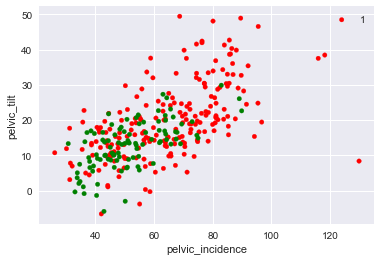

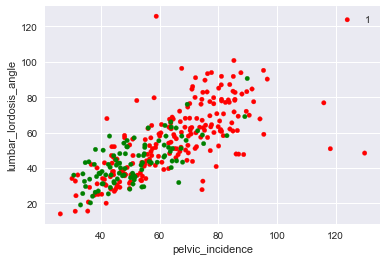

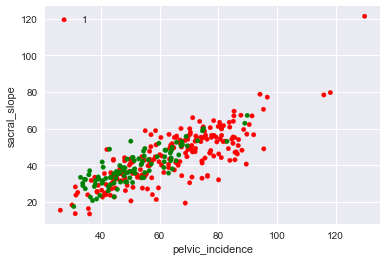

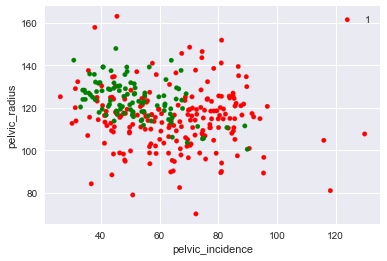

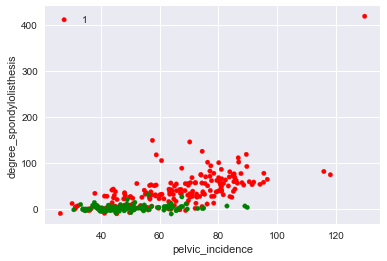

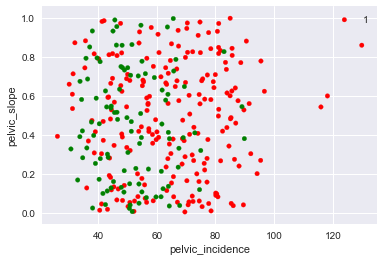

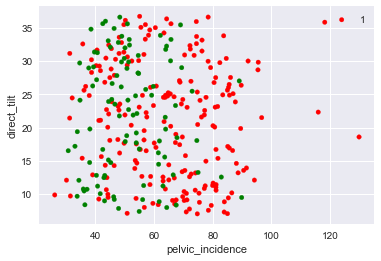

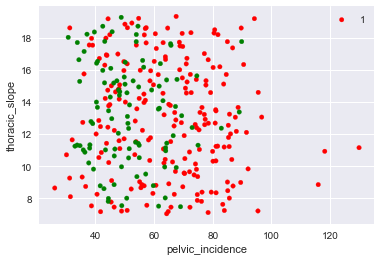

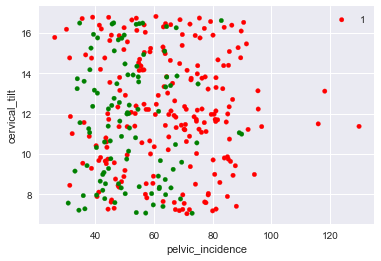

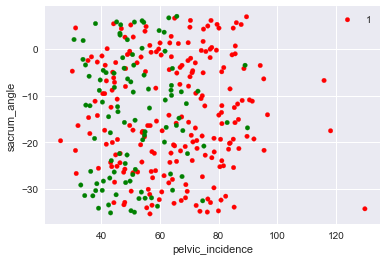

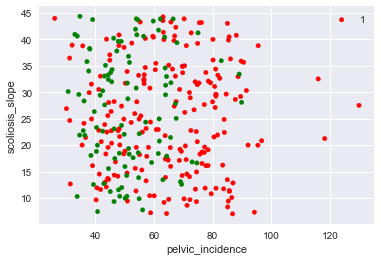

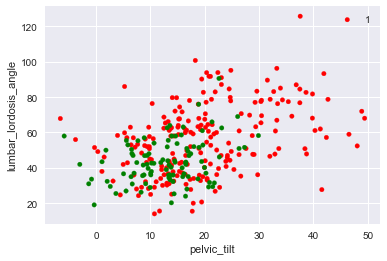

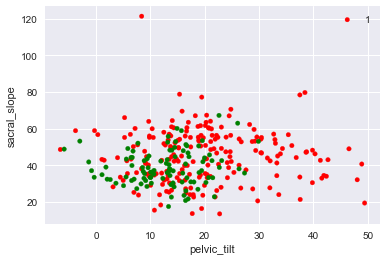

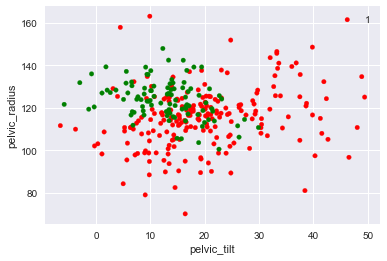

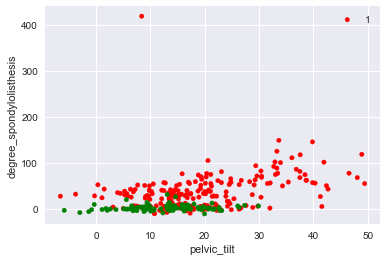

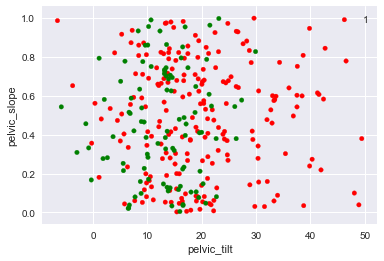

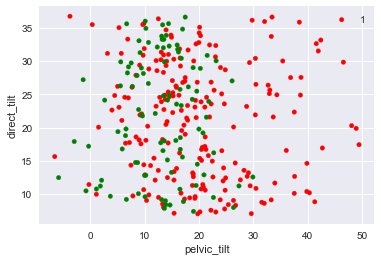

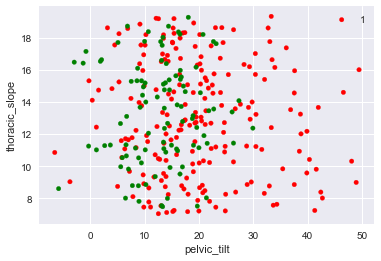

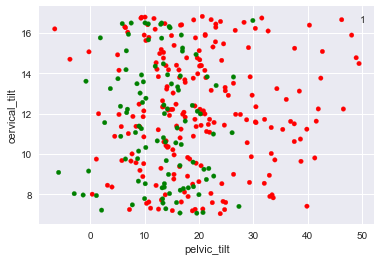

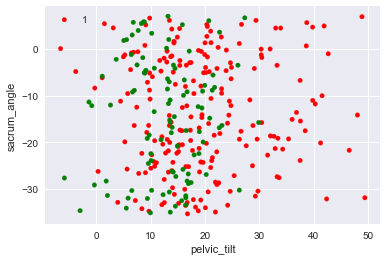

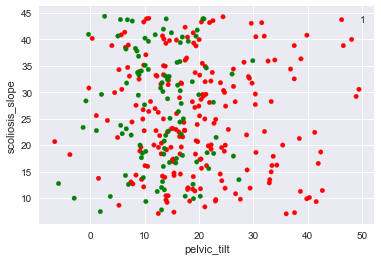

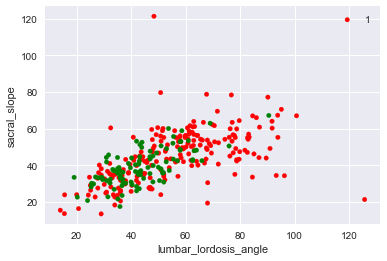

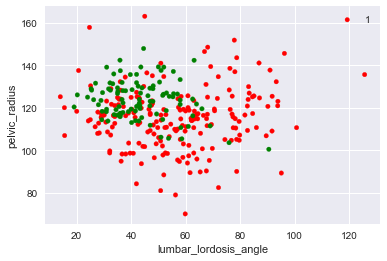

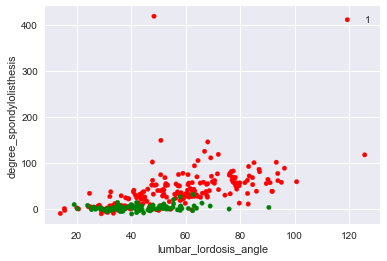

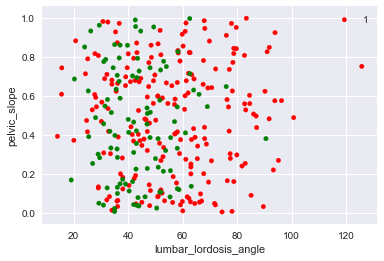

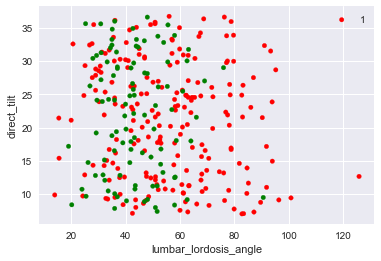

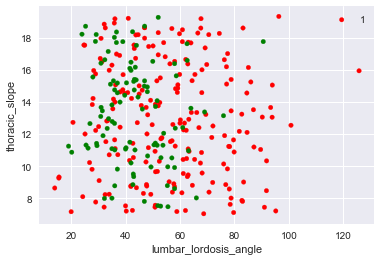

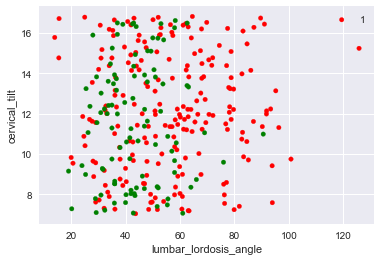

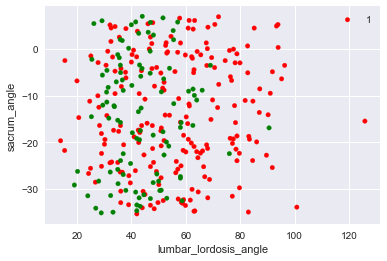

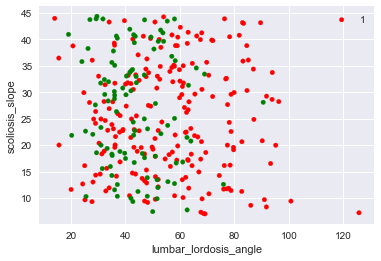

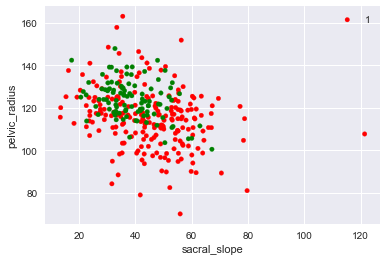

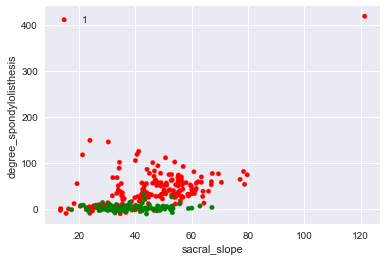

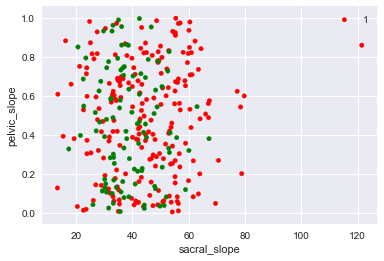

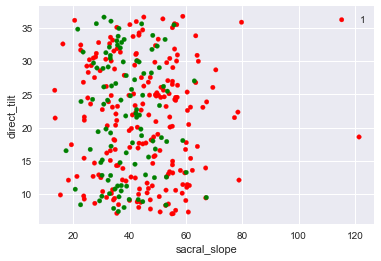

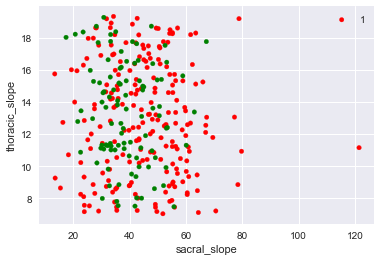

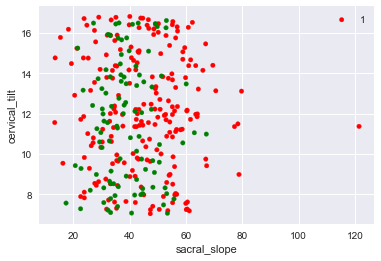

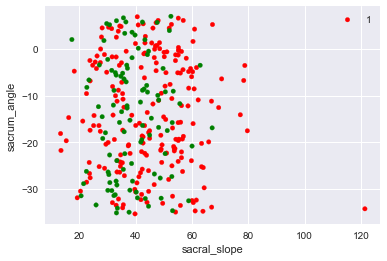

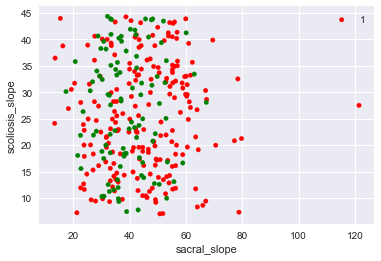

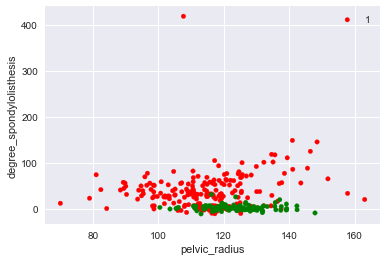

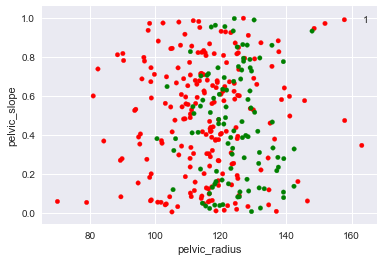

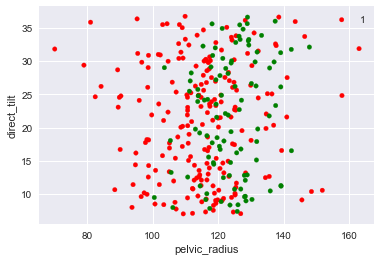

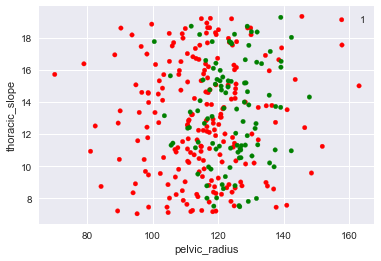

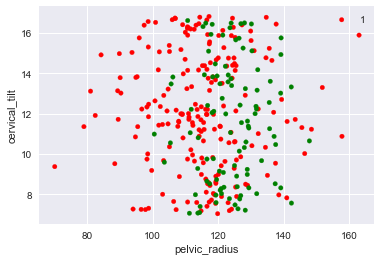

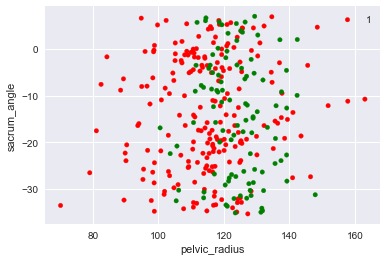

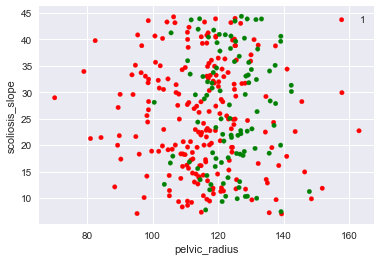

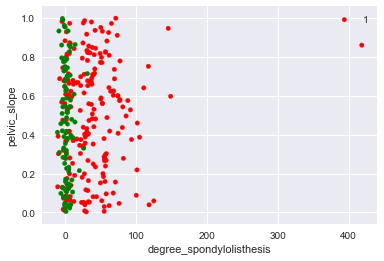

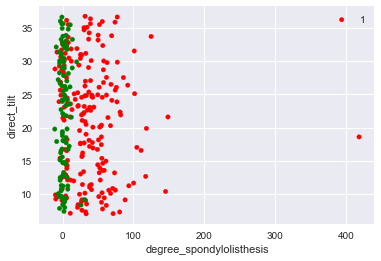

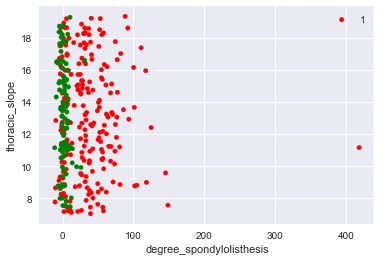

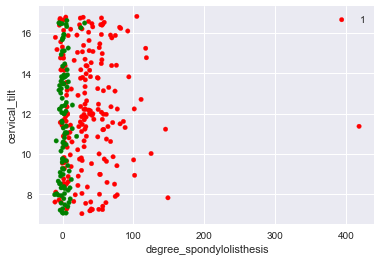

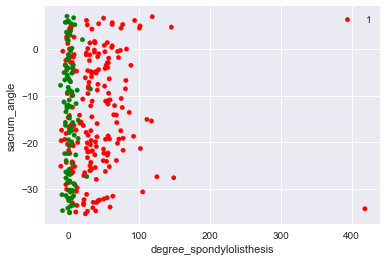

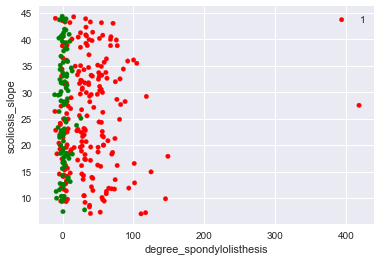

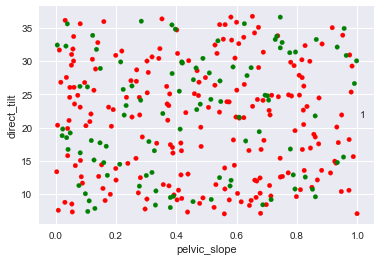

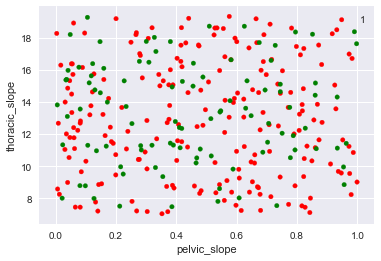

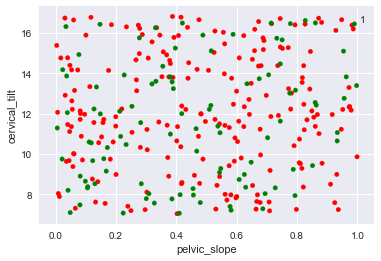

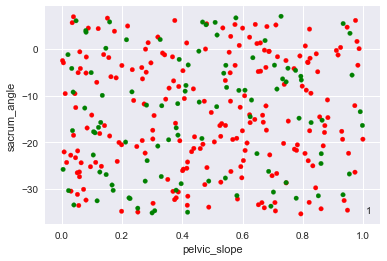

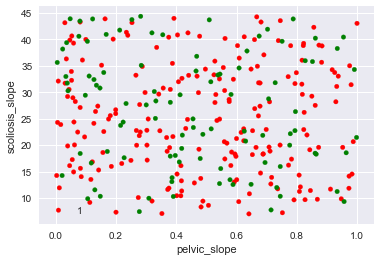

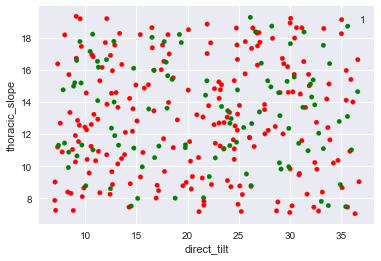

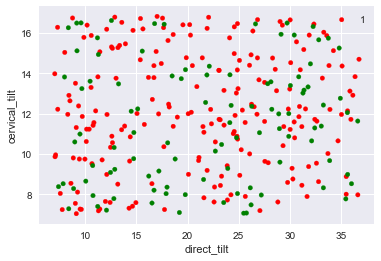

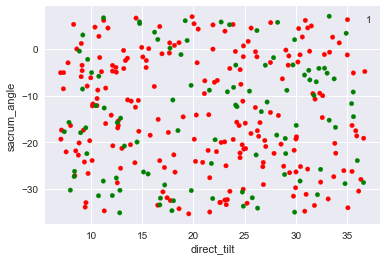

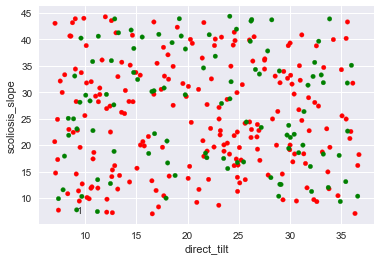

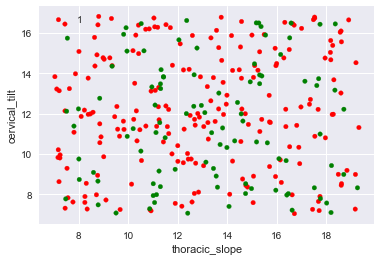

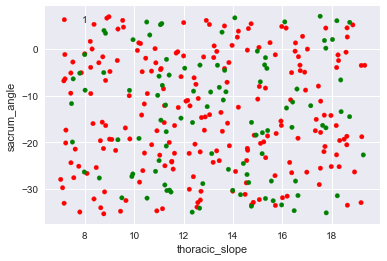

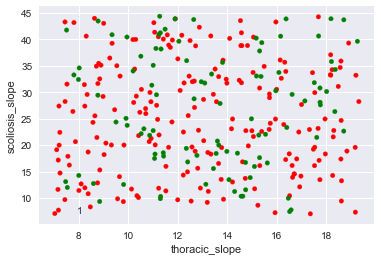

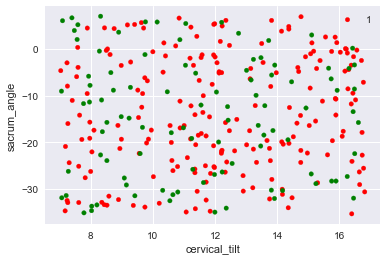

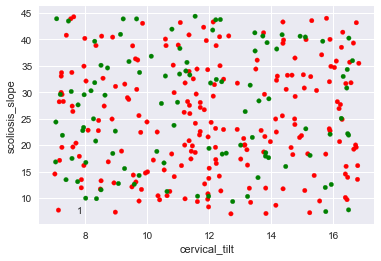

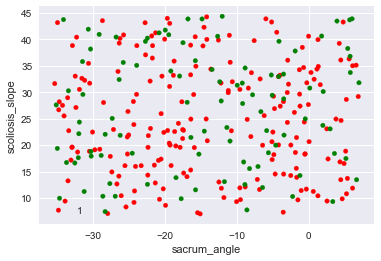

In [2]:
columns = ['pelvic_incidence', 'pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']
bh.scatter_plot_combos(df, columns)

### Correlation Matrix

In [3]:
corrs_df = df.drop('classification', 1)
corrs_df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


### Correlation Heat Map

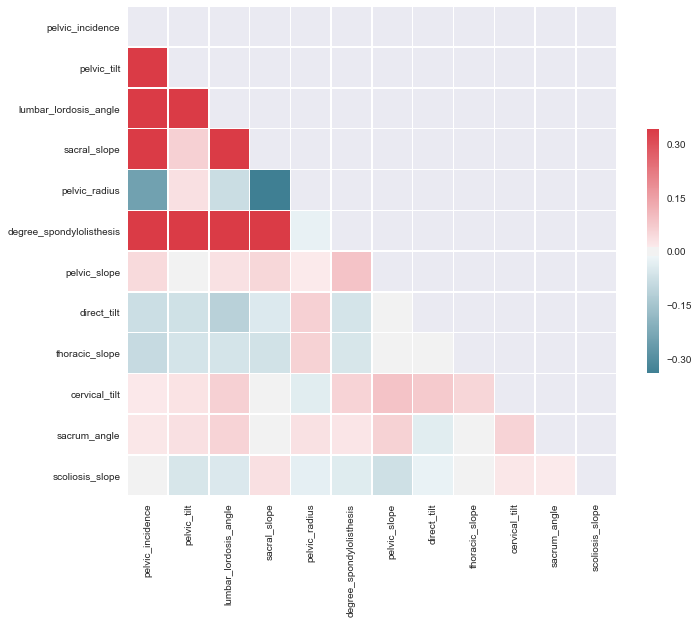

In [4]:
bh.heat_map(corrs_df)

### Described Box Plots

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

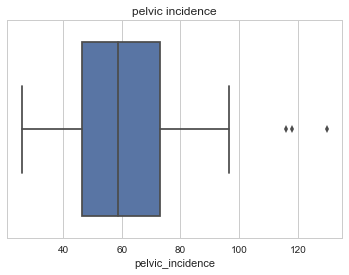

In [5]:
bh.box_plot(df, columns[0])
df[columns[0]].describe()

count    310.000000
mean      17.542822
std       10.008330
min       -6.554948
25%       10.667069
50%       16.357689
75%       22.120395
max       49.431864
Name: pelvic_tilt, dtype: float64

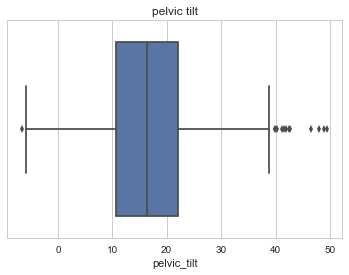

In [6]:
bh.box_plot(df, columns[1])
df[columns[1]].describe()

count    310.000000
mean      51.930930
std       18.554064
min       14.000000
25%       37.000000
50%       49.562398
75%       63.000000
max      125.742385
Name: lumbar_lordosis_angle, dtype: float64

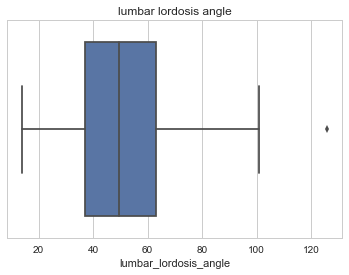

In [7]:
bh.box_plot(df, columns[2])
df[columns[2]].describe()

count    310.000000
mean      42.953831
std       13.423102
min       13.366931
25%       33.347122
50%       42.404912
75%       52.695888
max      121.429566
Name: sacral_slope, dtype: float64

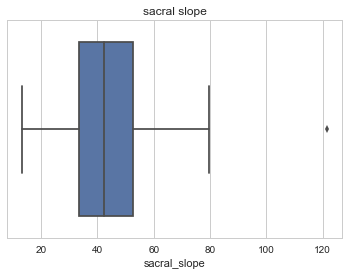

In [8]:
bh.box_plot(df, columns[3])
df[columns[3]].describe()

count    310.000000
mean     117.920655
std       13.317377
min       70.082575
25%      110.709196
50%      118.268178
75%      125.467674
max      163.071041
Name: pelvic_radius, dtype: float64

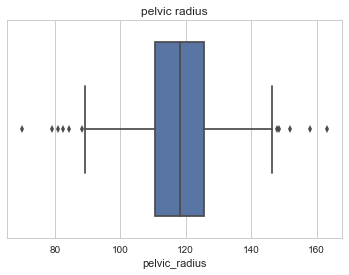

In [9]:
bh.box_plot(df, columns[4])
df[columns[4]].describe()

count    310.000000
mean      26.296694
std       37.559027
min      -11.058179
25%        1.603727
50%       11.767934
75%       41.287352
max      418.543082
Name: degree_spondylolisthesis, dtype: float64

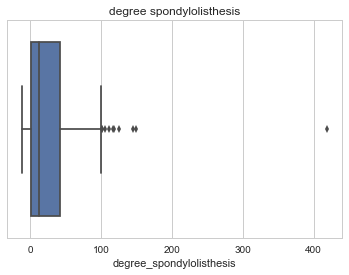

In [10]:
bh.box_plot(df, columns[5])
df[columns[5]].describe()

count    310.000000
mean       0.472979
std        0.285787
min        0.003220
25%        0.224367
50%        0.475989
75%        0.704846
max        0.998827
Name: pelvic_slope, dtype: float64

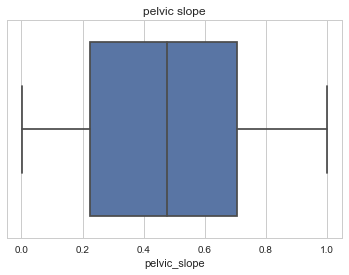

In [11]:
bh.box_plot(df, columns[6])
df[columns[6]].describe()

count    310.000000
mean      21.321526
std        8.639423
min        7.027000
25%       13.054400
50%       21.907150
75%       28.954075
max       36.743900
Name: direct_tilt, dtype: float64

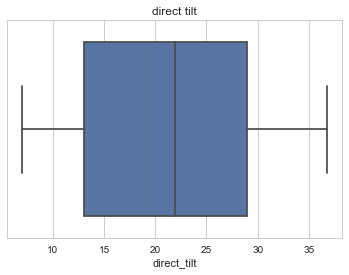

In [12]:
bh.box_plot(df, columns[7])
df[columns[7]].describe()

count    310.000000
mean      13.064511
std        3.399713
min        7.037800
25%       10.417800
50%       12.938450
75%       15.889525
max       19.324000
Name: thoracic_slope, dtype: float64

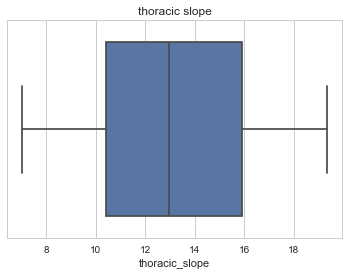

In [13]:
bh.box_plot(df, columns[8])
df[columns[8]].describe()

count    310.000000
mean      11.933317
std        2.893265
min        7.030600
25%        9.541140
50%       11.953835
75%       14.371810
max       16.821080
Name: cervical_tilt, dtype: float64

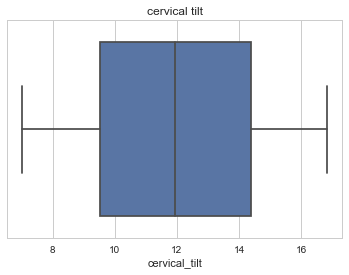

In [14]:
bh.box_plot(df, columns[9])
df[columns[9]].describe()

count    310.000000
mean     -14.053139
std       12.225582
min      -35.287375
25%      -24.289522
50%      -14.622856
75%       -3.497094
max        6.972071
Name: sacrum_angle, dtype: float64

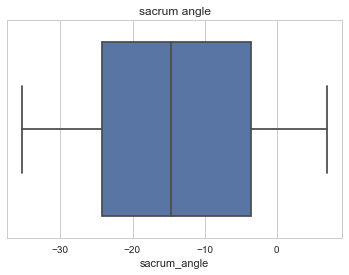

In [15]:
bh.box_plot(df, columns[10])
df[columns[10]].describe()

count    310.000000
mean      25.645981
std       10.450558
min        7.007900
25%       17.189075
50%       24.931950
75%       33.979600
max       44.341200
Name: scoliosis_slope, dtype: float64

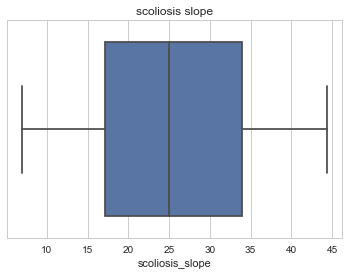

In [17]:
bh.box_plot(df, columns[11])
df[columns[11]].describe()